In [130]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [131]:
with open('names.txt', 'r') as f:
    names = f.read().splitlines()

possible_chars = sorted(list(set('.' + ''.join(names))))
n_possible_chars = len(possible_chars)

In [151]:
# Hyperparameters

n_dimension = 2
LookUp = torch.rand((n_possible_chars, n_dimension))

n_context_block = 4

size_interm_layer = 500
W1 = torch.rand((n_context_block * n_dimension, size_interm_layer))
b1 = torch.rand((1, size_interm_layer))

W2 = torch.rand((size_interm_layer, 27))
b2 = torch.rand((1, 27))

parameters = [LookUp, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [154]:
X = []
Y = []

for name in names:
    context = [0] * n_context_block
    for char in name + '.':
        char_index = possible_chars.index(char)
        X.append(context)
        Y.append(char_index)
        context = context[1:] + [char_index]

X = torch.tensor(X)
Y = torch.tensor(Y)

n_total_examples = len(X)
n_80pct = int(n_total_examples * 0.8)
n_90pct = int(n_total_examples * 0.9)

X_train = X[:n_80pct]
Y_train = Y[:n_80pct]

X_val = X[n_80pct:n_90pct]
Y_val = Y[n_80pct:n_90pct]

X_test = X[n_90pct:]
Y_test = X[n_90pct:]

In [155]:
loss_hist = []

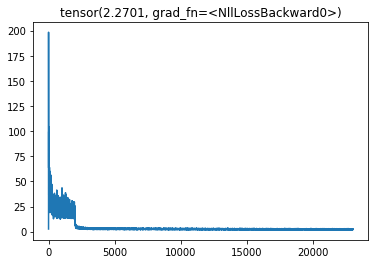

In [159]:
BATCH_SIZE = 64

for i in range(20000):

    bach_idx = torch.randint(0, X_train.shape[0], (BATCH_SIZE,))
    X_batch = X_train[bach_idx]
    Y_batch = Y_train[bach_idx]

    X_emb = LookUp[X_batch].view(-1, n_context_block * n_dimension)

    interm_layer = (X_emb @ W1 + b1).tanh()
    output_layer = (interm_layer @ W2 + b2)

    loss = F.cross_entropy(output_layer, Y_batch)
    loss_hist.append(loss.item())

    for p in parameters:
        p.grad = None
    loss.backward()

    for p in parameters:
        p.data += -0.01 * p.grad
        
plt.plot(loss_hist)
plt.title(loss)
plt.show()

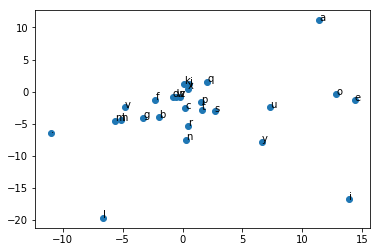

In [160]:
coord_x = []
coord_y = []
labels = []
for i in range(27):
    coord_x.append(LookUp[i, 0].data.item())
    coord_y.append(LookUp[i, 1].data.item())
    labels.append(possible_chars[i])

fig, ax = plt.subplots()
ax.scatter(coord_x, coord_y)

for i, txt in enumerate(labels):
    ax.annotate(txt, (coord_x[i], coord_y[i]))
plt.show()

In [161]:
# Sampling from Model
n_names = 20
softmax = torch.nn.Softmax(dim=1)

for _ in range(n_names):
    context = [0] * n_context_block
    new_char = None
    name = ''
    while new_char != '.':
        emb = LookUp[context].view(-1, n_context_block * n_dimension)

        interm_layer = (emb @ W1 + b1).tanh()
        output_layer = (interm_layer @ W2 + b2)
        probs = softmax(output_layer)

        new_char_idx = torch.multinomial(probs, num_samples=1).item()
        new_char = possible_chars[new_char_idx]
        name += new_char
        context = context[1:] + [new_char_idx]
    print(name)


tedie.
fyzis.
rahon.
azin.
emerhetta.
joyss.
jior.
chyle.
kayden.
lura.
halexnon.
ilyn.
ayie.
adelyn.
coniantiu.
jocfettny.
kulona.
saglynlyn.
emara.
eliana.
